In [2]:
using Graphs
using CairoMakie
using LinearAlgebra

g = complete_graph(5)

for e in filter(e -> e., edges(g))
    print(e)
end

Base.Meta.ParseError: ParseError:
# Error @ c:\Users\Roman\.julia\dev\PhyloPlot\demo\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:7:24

for e in filter(e -> e., edges(g))
#                      ╙ ── unexpected `,`

In [3]:
using Graphs
using LinearAlgebra

function repulsive_force(pu, pv, c_rep=2.0)
    return (c_rep/norm(pv - pu)^2) .* normalize(pu - pv)
end

function spring_force(pu, pv, c_spring=1.0, l = 2)
    return c_spring * log(norm(pv - pu)/l) .* normalize(pv - pu)
end

function attractive_force(pu, pv)
    spring_force(pu, pv) - repulsive_force(pu, pv)
end

function displacement_vector(graph, u, p)
    repulsive = sum([repulsive_force(p[u], p[v]) for v in vertices(graph) if v != u])
    attractive = sum(attractive_force(p[u], p[v]) for v in neighbors(graph, u))
    return repulsive + attractive
end

function initialize_p(g)
    return Dict( v => 2*rand(1,2).-1 for v in vertices(g))
end


function gen_eades(graph, p, epsilon=0.01, t_max=100)
    forces = Dict(v => [epsilon epsilon] for v in vertices(graph))
    t = 1 #time
    # continue until time is up or forces are to weak 
    while t < t_max && maximum(map(norm, values(forces))) > epsilon
        for u in vertices(graph)
            forces[u] = displacement_vector(graph, u, p)
        end
        for u in vertices(graph)
            p[u] = p[u] + 0.99 .* forces[u]
        end
        t += 1
    end
    return p
end

gen_eades (generic function with 3 methods)

In [8]:
p = initialize_p(g)

Dict{Int64, Matrix{Float64}} with 5 entries:
  5 => [0.690932 -0.834346]
  4 => [-0.112545 0.332536]
  2 => [0.707408 0.805522]
  3 => [0.208125 0.394899]
  1 => [-0.783319 0.714487]

In [9]:
gen_eades(g, p)

Dict{Int64, Matrix{Float64}} with 5 entries:
  5 => [0.734173 -2.92674]
  4 => [-2.7272 -1.2722]
  2 => [1.54956 3.22705]
  3 => [3.37735 -0.146051]
  1 => [-2.22327 2.53104]

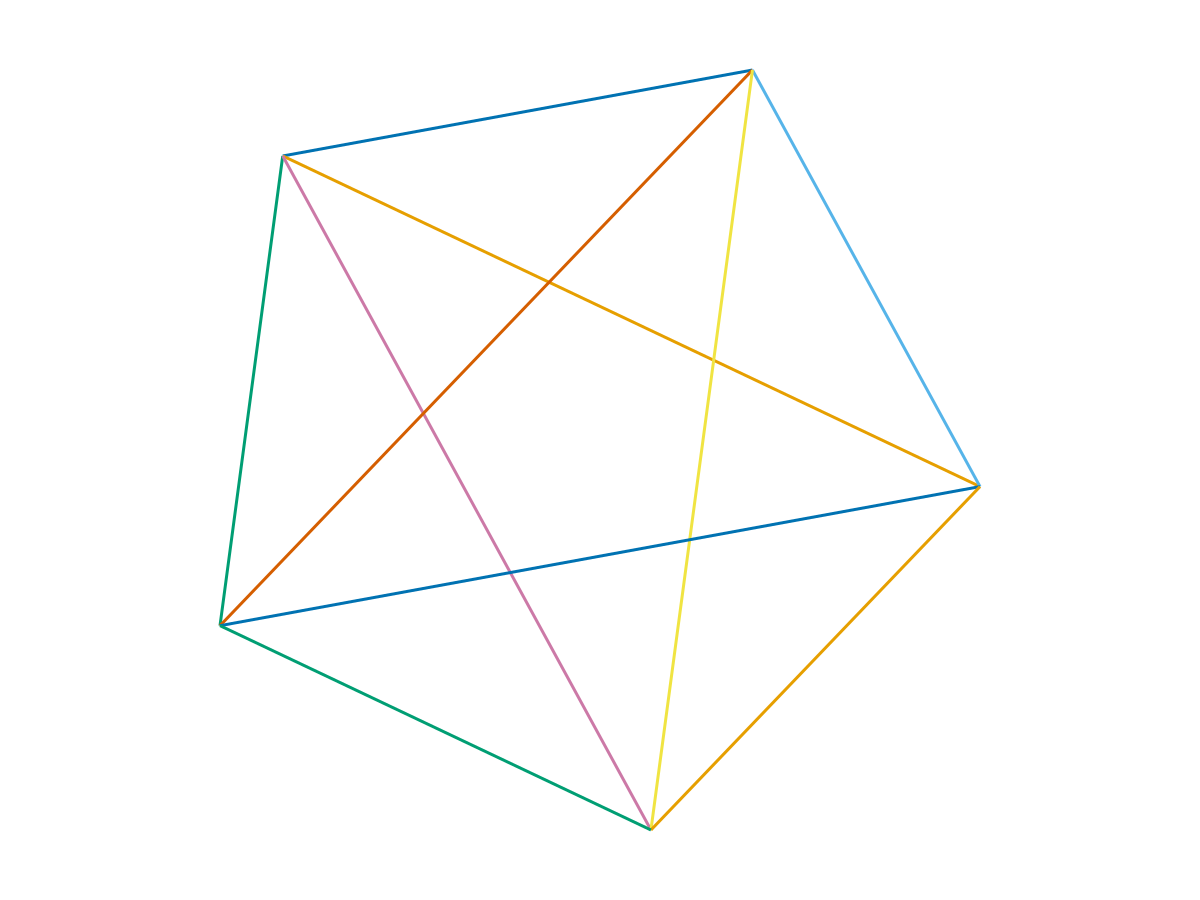

In [14]:
f = Figure()
ax = Axis(f[1,1])

for e in edges(g)
    srcx, srcy = p[src(e)]
    dstx, dsty = p[dst(e)]
    lines!([srcx, dstx], [srcy, dsty])
end

ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)

current_figure()